# Getting Started with ReproZip



In [11]:
!python -m pip install -U reprozip reprounzip graphviz

Requirement already up-to-date: reprozip in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.0.16)
Requirement already up-to-date: reprounzip in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.0.16)
Requirement already up-to-date: graphviz in /srv/conda/envs/notebook/lib/python3.7/site-packages (0.14.2)


First we set usage reporting, so the command output doesn't request it:

In [12]:
!reprozip usage_report --enable

Thank you, usage reports will be sent automatically from now on.


Then we change into the PDF folder, and trace the rendering of a PDF that has non-embedded fonts...

In [21]:
#input_file = 'test_fontArialNotEmbedded.pdf'
input_file = 'lorem-ipsum.pdf'

from pathlib import Path
input_file_prefix = Path(input_file).with_suffix('')

In [14]:
#%%bash
!rm -fr pdf/.reprozip-trace
# Use ReproZip to trace the process of converting a PDF to a series of page images:
!cd pdf && reprozip trace gs -sDEVICE=pngalpha -o {input_file_prefix}-%03d.png {input_file}

GPL Ghostscript 9.26 (2018-11-20)
Copyright (C) 2018 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
Processing pages 1 through 2.
Page 1
Page 2
Configuration file written in .reprozip-trace/config.yml
Edit that file then run the packer -- use 'reprozip pack -h' for help


In [15]:
# Remove any earlier effort:
!rm -f pdf/{input_file}.rpz
# Generate the package:
!cd pdf && reprozip pack {input_file}.rpz

In [16]:
# Remove any earlier effort:
!rm -f pdf/{input_file}.dot pdf/{input_file}.json
# Generate the dependency graph:
!reprounzip graph pdf/{input_file}.dot pdf/{input_file}.rpz
# And again, but in a simpler JSON format:
!reprounzip graph --json pdf/{input_file}.json pdf/{input_file}.rpz

In [17]:
!ls -lct pdf/{input_file}*

-rw-r--r-- 1 andy andy    18771 Nov  4 09:44 pdf/lorem-ipsum.pdf.json
-rw-r--r-- 1 andy andy    19498 Nov  4 09:44 pdf/lorem-ipsum.pdf.dot
-rw-r--r-- 1 andy andy 10987520 Nov  4 09:44 pdf/lorem-ipsum.pdf.rpz
-rw-r--r-- 1 andy andy    72152 Nov  4 09:31 pdf/lorem-ipsum.pdf.packages.dot.svg
-rw-r--r-- 1 andy andy     7708 Nov  4 09:30 pdf/lorem-ipsum.pdf.packages.dot
-rw-r--r-- 1 andy andy   134378 Nov  4 09:28 pdf/lorem-ipsum.pdf.dot.svg
-rw-r--r-- 1 andy andy    21450 Nov  2 19:16 pdf/lorem-ipsum.pdf


/home/andy/pdf/lorem-ipsum.pdf.dot.svg

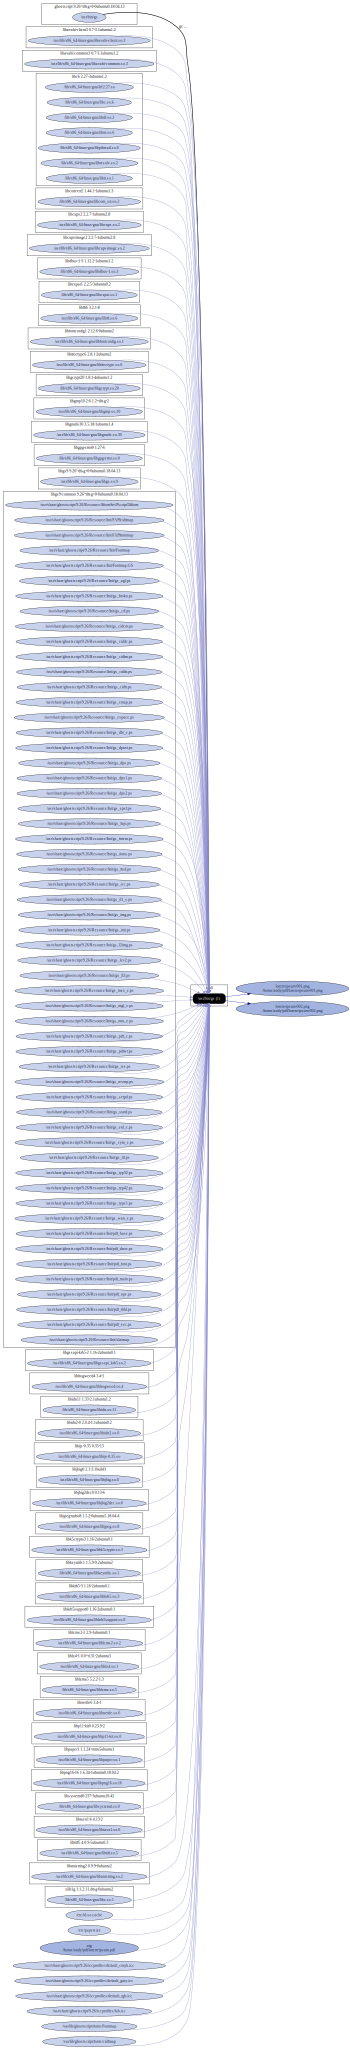

In [18]:
from graphviz import render
from IPython.display import SVG, HTML, FileLink, display

def show_dotfile(dot_file):
    render(engine='dot', filepath=dot_file, format='svg')

    # Give a link to download the SVG:
    svg_file = '%s.svg' % dot_file
    display(FileLink(svg_file))
    # Plot the SVG, but hack in a style to make it zoom out:
    style = "<style>.output_svg div {width:100% !important;height:100% !important;</style>"
    display(HTML(style))
    display(SVG(filename=svg_file))

# Render to SVG:
show_dotfile ('pdf/%s.dot' % input_file)


In [19]:
# Remove any earlier effort:
!rm -f pdf/{input_file}.packages.dot
# Generate the dependency graph but at package level (to make it easier to see what's going on):
!reprounzip graph --packages package pdf/{input_file}.packages.dot pdf/{input_file}.rpz

/home/andy/pdf/lorem-ipsum.pdf.packages.dot.svg

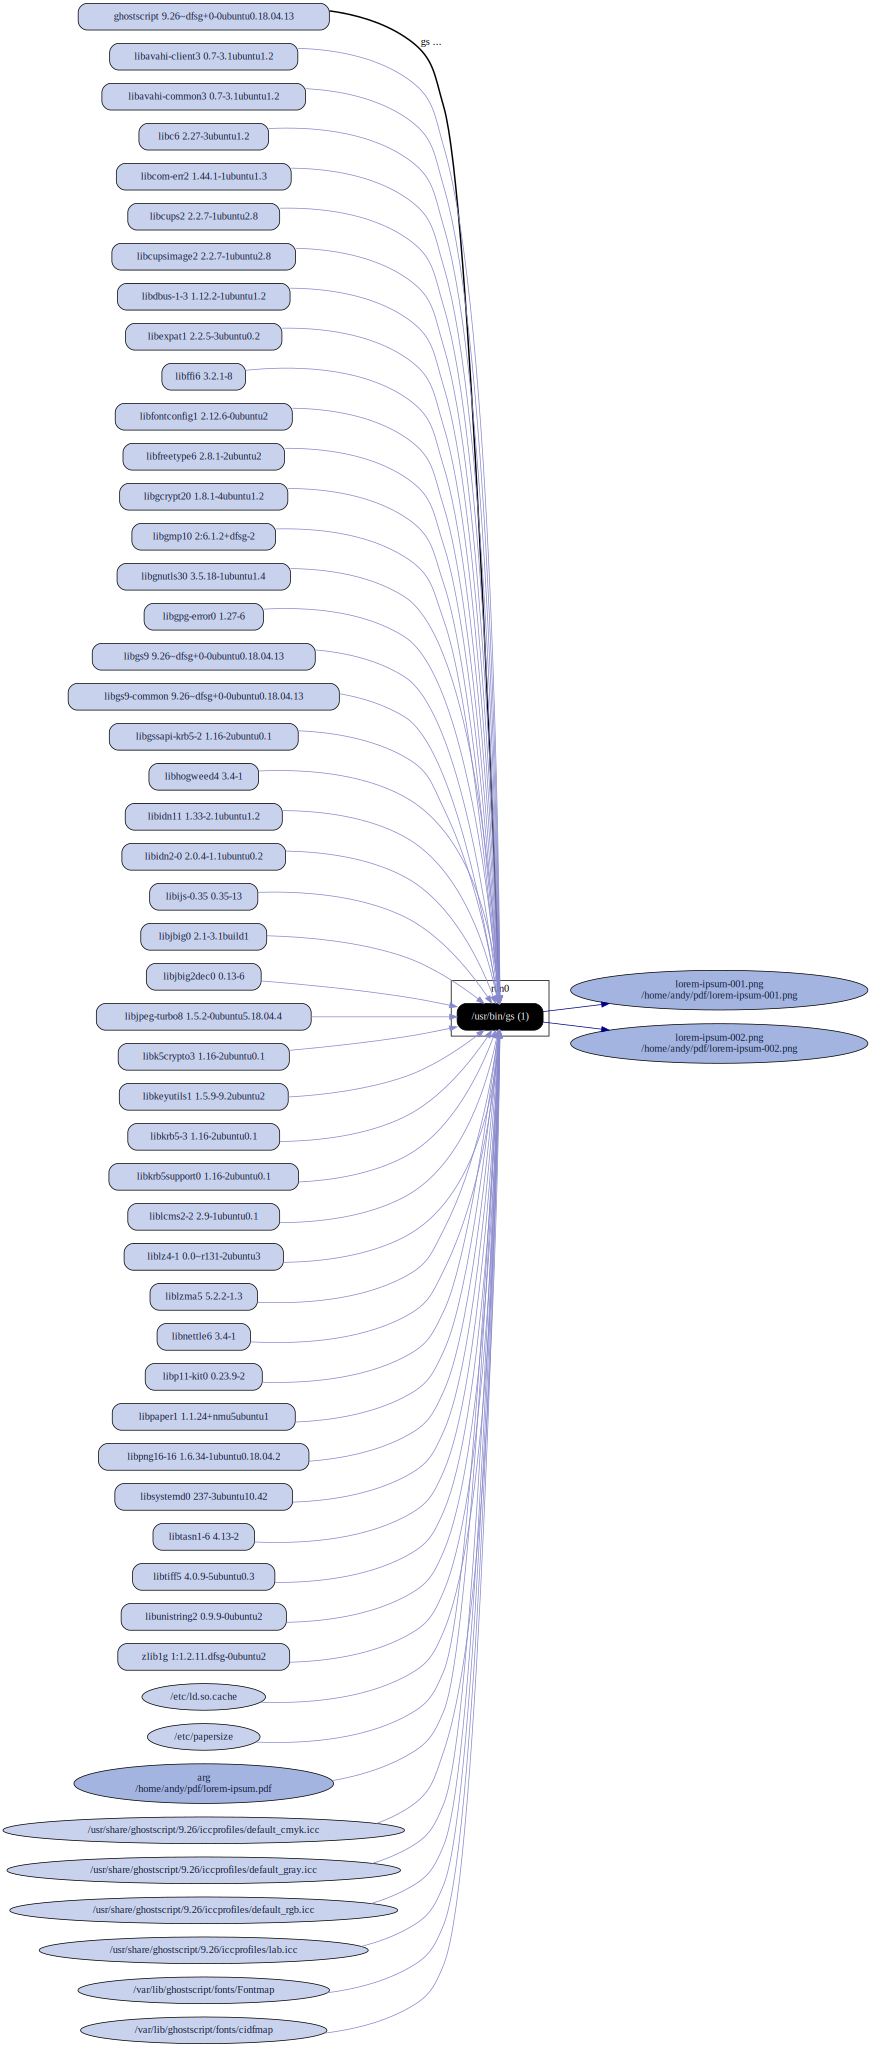

In [20]:
show_dotfile('pdf/%s.packages.dot' % input_file)